In [1]:
import os
import re

import scanpy as sc
import pandas as pd
import numpy as np

In [15]:
adata = sc.read_h5ad('../data/pdac/all_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 33912 × 2999
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'type', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colo

In [3]:
# adata = sc.read_h5ad('../data/pdac/merged_processed_surgical.h5ad')
# adata

In [4]:
adata.X

array([[-0.07558756, -0.00984309,  3.3407598 , ..., -0.05608108,
        -0.15209238, -0.02238847],
       [-0.34753948, -0.00597895, -0.17229682, ..., -0.0963589 ,
        -0.18841197, -0.02798048],
       [-0.02941567, -0.00764124, -0.21202475, ..., -0.04866306,
        -0.14670809, -0.01766966],
       ...,
       [-0.12268746, -0.00621499, -0.19641253, ..., -0.06245673,
        -0.1591923 , -0.01945441],
       [-0.07738956, -0.01702447, -0.24671139, ..., -0.05780975,
        -0.15036094, -0.03193111],
       [-0.1124116 , -0.00554647, -0.19464637, ..., -0.0607696 ,
        -0.15804282, -0.0181688 ]], dtype=float32)

In [5]:
counts_adata = sc.read_h5ad('../data/pdac/merged.h5ad')
counts_adata

AnnData object with n_obs × n_vars = 58708 × 19480
    obs: 'sample_id', 'batch', 'n_genes'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells'

In [18]:
# surgical_mask = [True if s_id in ['1555-tumor',
#  'H_ZY-1105-07',
#  'H_ZY-1160-06',
#  'H_ZY-1174-06',
#  'H_ZY-1305-06',
#  'TWCE-HT055P-S1PAG',
#  'TWCE-HT081P1-XB1'] else False for s_id in counts_adata.obs['sample_id']]
# filtered = counts_adata[surgical_mask]
# counts = pd.DataFrame(data=filtered.X.toarray(), columns=filtered.var.index,
#                      index=filtered.obs['sample_id'])
# counts
# counts.to_csv('../data/pdac/surgical_counts.txt', sep='\t', index=True, header=True)

In [19]:
# set(filtered.X[:10].toarray().flatten())

In [ ]:
adata = sc.read_h5ad('../data/pdac/merged_processed_surgical.h5ad')
adata

## prepare for cytotrace

In [7]:
# filtered = adata[((adata.obs['cell_type']=='malignant_classical') | (adata.obs['cell_type']=='malignant_squamous_like'))]
filtered = adata[adata.obs['cell_type']=='malignant_classical']

filtered

View of AnnData object with n_obs × n_vars = 1585 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'neigh

In [8]:
filtered_counts = counts_adata[filtered.obs.index]
filtered_counts

View of AnnData object with n_obs × n_vars = 1585 × 19480
    obs: 'sample_id', 'batch', 'n_genes'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells'

In [9]:
counts_df = pd.DataFrame(data=filtered_counts.X.toarray().astype(np.int64), columns=filtered_counts.var.index,
                    index=filtered_counts.obs.index).transpose()
counts_df.index.name = 'Gene'
counts_df

,AAACCTGTCTAACTTC-1-7,ACAGCCGAGGTCATCT-1-7,ACGATACAGTGACATA-1-7,ACTGAACTCTTAGCCC-1-7,ACTGCTCGTCGGCATC-1-7,AGCAGCCCACCTGGTG-1-7,ATTACTCGTGATAAGT-1-7,CAACTAGCATGGTAGG-1-7,CAGCGACGTGCGCTTG-1-7,CAGTCCTGTTCACCTC-1-7,...,TTATGCTGTAGTGAAT-1-20,TTCGAAGGTAGGCTGA-1-20,TTCGGTCAGATCCTGT-1-20,TTCTACAGTATAAACG-1-20,TTCTACATCCACGCAG-1-20,TTTACTGCATAGACTC-1-20,TTTCCTCGTACAGTGG-1-20,TTTCCTCGTGTGACGA-1-20,TTTGGTTAGAACTGTA-1-20,TTTGTCAGTTCCACGG-1-20
Gene,,,,,,,,,,,,,,,,,,,,,
FAM87B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
FAM41C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC004556.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
counts_df.to_csv('../data/cytotrace/eus_classical_only_counts.txt', sep='\t', header=True, index=True)

## load back in after cytotrace run

In [16]:
cytotrace_df = pd.read_csv('../data/cytotrace/results/cytotrace_combined_results.txt', sep='\t')
cytotrace_df.index = [x.replace('.', '-') for x in cytotrace_df.index]
cytotrace_df = cytotrace_df[['x']]
cytotrace_df.columns = ['cytotrace']
cytotrace_df

,cytotrace
AAACCTGAGTGCGTGA-1-0,0.938650
AAACGGGAGACAATAC-1-0,0.864008
AACCGCGAGCAATCTC-1-0,0.676892
AACCGCGTCTTTAGTC-1-0,0.859918
AACTCCCCAAACAACA-1-0,0.715746
...,...
TTTACTGCATAGACTC-1-20,0.026585
TTTCCTCGTACAGTGG-1-20,0.707566
TTTCCTCGTGTGACGA-1-20,0.015337
TTTGGTTAGAACTGTA-1-20,0.884458


In [17]:
filtered = adata[cytotrace_df.index].copy()
filtered.obs = pd.merge(filtered.obs, cytotrace_df, left_index=True, right_index=True)
filtered.obs

,sample_id,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,type,leiden,cell_type,cytotrace
AAACCTGAGTGCGTGA-1-0,1555-tumor,0,4134,4133,20751.0,1307.0,6.298491,Surgical,14,Malignant - Classical,0.938650
AAACGGGAGACAATAC-1-0,1555-tumor,0,3973,3973,18297.0,689.0,3.765645,Surgical,26,Malignant - Classical,0.864008
AACCGCGAGCAATCTC-1-0,1555-tumor,0,5534,5533,54296.0,3791.0,6.982098,Surgical,26,Malignant - Classical,0.676892
AACCGCGTCTTTAGTC-1-0,1555-tumor,0,5363,5363,37574.0,2281.0,6.070687,Surgical,38,Malignant - Classical,0.859918
AACTCCCCAAACAACA-1-0,1555-tumor,0,735,735,2257.0,108.0,4.785113,Surgical,12,Malignant - Classical,0.715746
...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGCATAGACTC-1-20,wu24,20,1395,1395,2209.0,209.0,9.461295,EUS-FNB,14,Malignant - Classical,0.026585
TTTCCTCGTACAGTGG-1-20,wu24,20,1356,1356,3958.0,4.0,0.101061,EUS-FNB,14,Malignant - Classical,0.707566
TTTCCTCGTGTGACGA-1-20,wu24,20,2017,2017,3937.0,372.0,9.448819,EUS-FNB,14,Malignant - Classical,0.015337
TTTGGTTAGAACTGTA-1-20,wu24,20,2695,2695,6658.0,324.0,4.866326,EUS-FNB,14,Malignant - Classical,0.884458


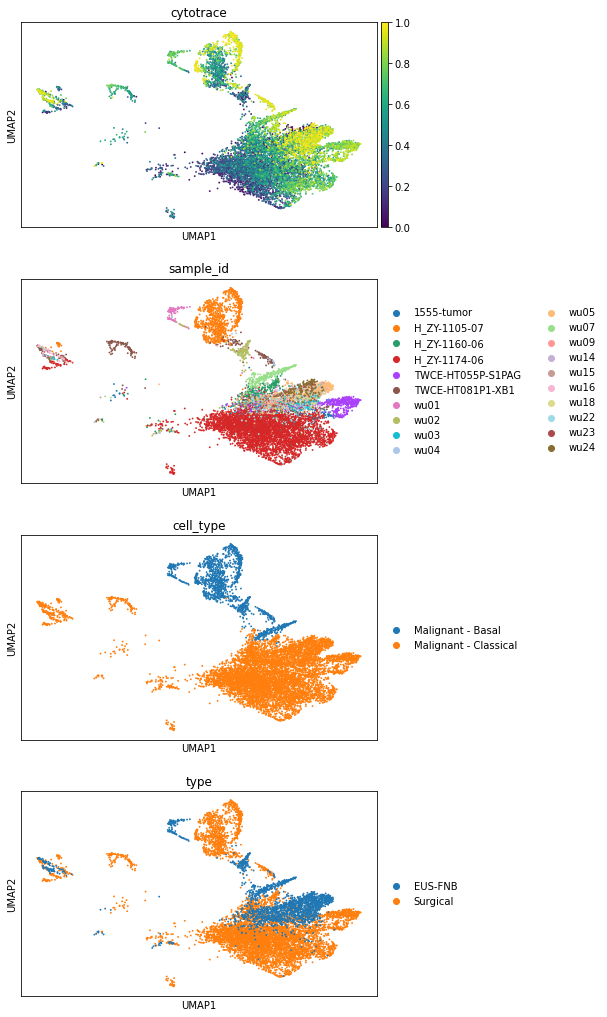

In [19]:
sc.pl.umap(filtered, color=['cytotrace', 'sample_id', 'cell_type', 'type'], ncols=1)

In [17]:
cell_to_cytotrace = {c:cyto for c, cyto in zip(filtered.obs.index, filtered.obs['cytotrace'])}
adata.obs['cytotrace'] = [cell_to_cytotrace.get(c) for c in adata.obs.index]
adata.obs

,sample_id,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type,cytotrace
AAACCTGCACCACGTG-1-7,wu01,7,280,280,453.0,28.0,6.181015,7,monocyte_1,NaN
AAACCTGTCTAACTTC-1-7,wu01,7,234,234,473.0,0.0,0.000000,2,malignant_classical,0.163357
AAACGGGCAAGGCTCC-1-7,wu01,7,690,690,1478.0,41.0,2.774019,3,monocyte_2,NaN
AAACGGGTCATTCACT-1-7,wu01,7,441,441,856.0,67.0,7.827103,7,monocyte_1,NaN
AAACGGGTCTGTGCAA-1-7,wu01,7,775,775,2019.0,76.0,3.764240,3,monocyte_2,NaN
...,...,...,...,...,...,...,...,...,...,...
TTTCCTCGTACAGTGG-1-20,wu24,20,1356,1356,3958.0,4.0,0.101061,10,malignant_classical,0.467008
TTTCCTCGTGTGACGA-1-20,wu24,20,2017,2017,3937.0,372.0,9.448819,19,malignant_classical,0.042921
TTTGGTTAGAACTGTA-1-20,wu24,20,2695,2695,6658.0,324.0,4.866326,2,malignant_classical,0.611787
TTTGGTTAGATGTGGC-1-20,wu24,20,820,820,1299.0,114.0,8.775982,12,myCAF,NaN


In [18]:
adata.write_h5ad('../results/cytotrace/eus_adata_11032020.h5ad')

## for prath

In [24]:
adata = sc.read_h5ad('../results/cytotrace/eus_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 11030 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 

In [25]:
adata.obs[['sample_id', 'cell_type', 'cytotrace']]

,sample_id,cell_type,cytotrace
AAACCTGCACCACGTG-1-7,wu01,monocyte_1,NaN
AAACCTGTCTAACTTC-1-7,wu01,malignant_classical,0.143171
AAACGGGCAAGGCTCC-1-7,wu01,monocyte_2,NaN
AAACGGGTCATTCACT-1-7,wu01,monocyte_1,NaN
AAACGGGTCTGTGCAA-1-7,wu01,monocyte_2,NaN
...,...,...,...
TTTCCTCGTACAGTGG-1-20,wu24,malignant_classical,0.481176
TTTCCTCGTGTGACGA-1-20,wu24,malignant_classical,0.035999
TTTGGTTAGAACTGTA-1-20,wu24,malignant_classical,0.613081
TTTGGTTAGATGTGGC-1-20,wu24,myCAF,NaN


In [26]:
adata.obs[['sample_id', 'cell_type', 'cytotrace']].to_csv('../results/cytotrace/prath_eus_dataframe.tsv',
                                                         sep='\t', index=True, header=True)

In [27]:
set(adata.obs['cell_type'])

{'DC',
 'acinar',
 'b_cell',
 'cd4_t_cell',
 'cd8_t_cell',
 'endocrine',
 'endothelial',
 'epithelial',
 'erythrocyte_1',
 'erythrocyte_2',
 'iCAF',
 'malignant_classical',
 'malignant_squamous_like',
 'mast',
 'monocyte_1',
 'monocyte_2',
 'myCAF',
 'myocyte',
 'nk',
 'plasma'}

In [23]:
df = pd.read_csv('../results/cytotrace/eus_classical_only_11032020_gene_correlations.txt',
                sep='\t', header=None)
df.columns = ['gene', 'cytotrace_correlation']
df = df.sort_values('cytotrace_correlation', ascending=False)
df

,gene,cytotrace_correlation
2107,TMSB10,0.833670
10789,MYL6,0.820549
1027,S100A11,0.793397
14992,PPDPF,0.791882
11126,COX6A1,0.791617
...,...,...
4958,PCDHGA6,-0.082043
4961,PCDHGA8,-0.083933
16192,ZNF587B,-0.085920
16194,ZNF587,-0.087492


In [39]:
list(df['gene'][:100])

['TMSB10',
 'MYL6',
 'S100A11',
 'PPDPF',
 'COX6A1',
 'B2M',
 'MYL12B',
 'CLIC1',
 'SERF2',
 'HLA-C',
 'COX4I1',
 'CFL1',
 'TMSB4X',
 'COX6B1',
 'COX7A2',
 'SPINT2',
 'ACTB',
 'CHCHD2',
 'CD63',
 'HLA-A',
 'LGALS3',
 'HLA-B',
 'S100A6',
 'GSTP1',
 'PTMA',
 'PPIA',
 'FAU',
 'MYL12A',
 'GNG5',
 'RHOA',
 'H3F3A',
 'RPL15',
 'RPL19',
 'H3F3B',
 'SUMO2',
 'CALM2',
 'TAGLN2',
 'RPS14',
 'SH3BGRL3',
 'COX5B',
 'ARPC3',
 'RPL8',
 'ANXA2',
 'TMBIM6',
 'FTH1',
 'RPS26',
 'RPS27A',
 'PRDX5',
 'SRP14',
 'UBL5',
 'TPT1',
 'ROMO1',
 'EEF1A1',
 'TMEM258',
 'TXN',
 'KRT18',
 'RPL11',
 'RAC1',
 'RPL29',
 'RPS15A',
 'EPCAM',
 'DSTN',
 'EDF1',
 'ACTG1',
 'RPS25',
 'OST4',
 'RPL37',
 'RPL41',
 'RPL39',
 'RPL13',
 'COX6C',
 'HSP90AA1',
 'RPS27',
 'YWHAZ',
 'NDUFB4',
 'RPL24',
 'HSBP1',
 'TSPO',
 'RPLP2',
 'RPS12',
 'RHOC',
 'RPS28',
 'RPL10',
 'RPS13',
 'RPS3',
 'KRT8',
 'RPL7A',
 'IFI27',
 'OAZ1',
 'RPL35A',
 'KRT19',
 'RPS15',
 'COX7C',
 'RPL28',
 'GPX4',
 'COX8A',
 'TMEM59',
 'RPL14',
 'UBA52',
 'TSPAN3

In [28]:
sq = pd.read_csv('../results/cytotrace/Squamous_Differential_Index_Gene_Scores_Updated.txt',
                sep='\t')
sq = sq.set_index('gene')
sq

,squamous_diff_index
gene,
LGALS1,39.043777
KRT6A,31.473990
GAPDH,27.505606
TPI1,23.034534
MIF,19.547117
...,...
SPINK1,-17.251524
CEACAM6,-17.500430
LGALS4,-17.599150


In [29]:
import matplotlib.pyplot as plt

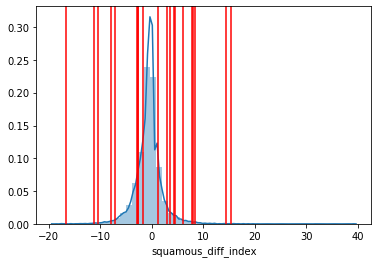

In [32]:
import seaborn as sns
sns.distplot(sq['squamous_diff_index'])

for g in list(df['gene'][:20]):
    v = sq.loc[g, 'squamous_diff_index']
    plt.axvline(v, c='red')

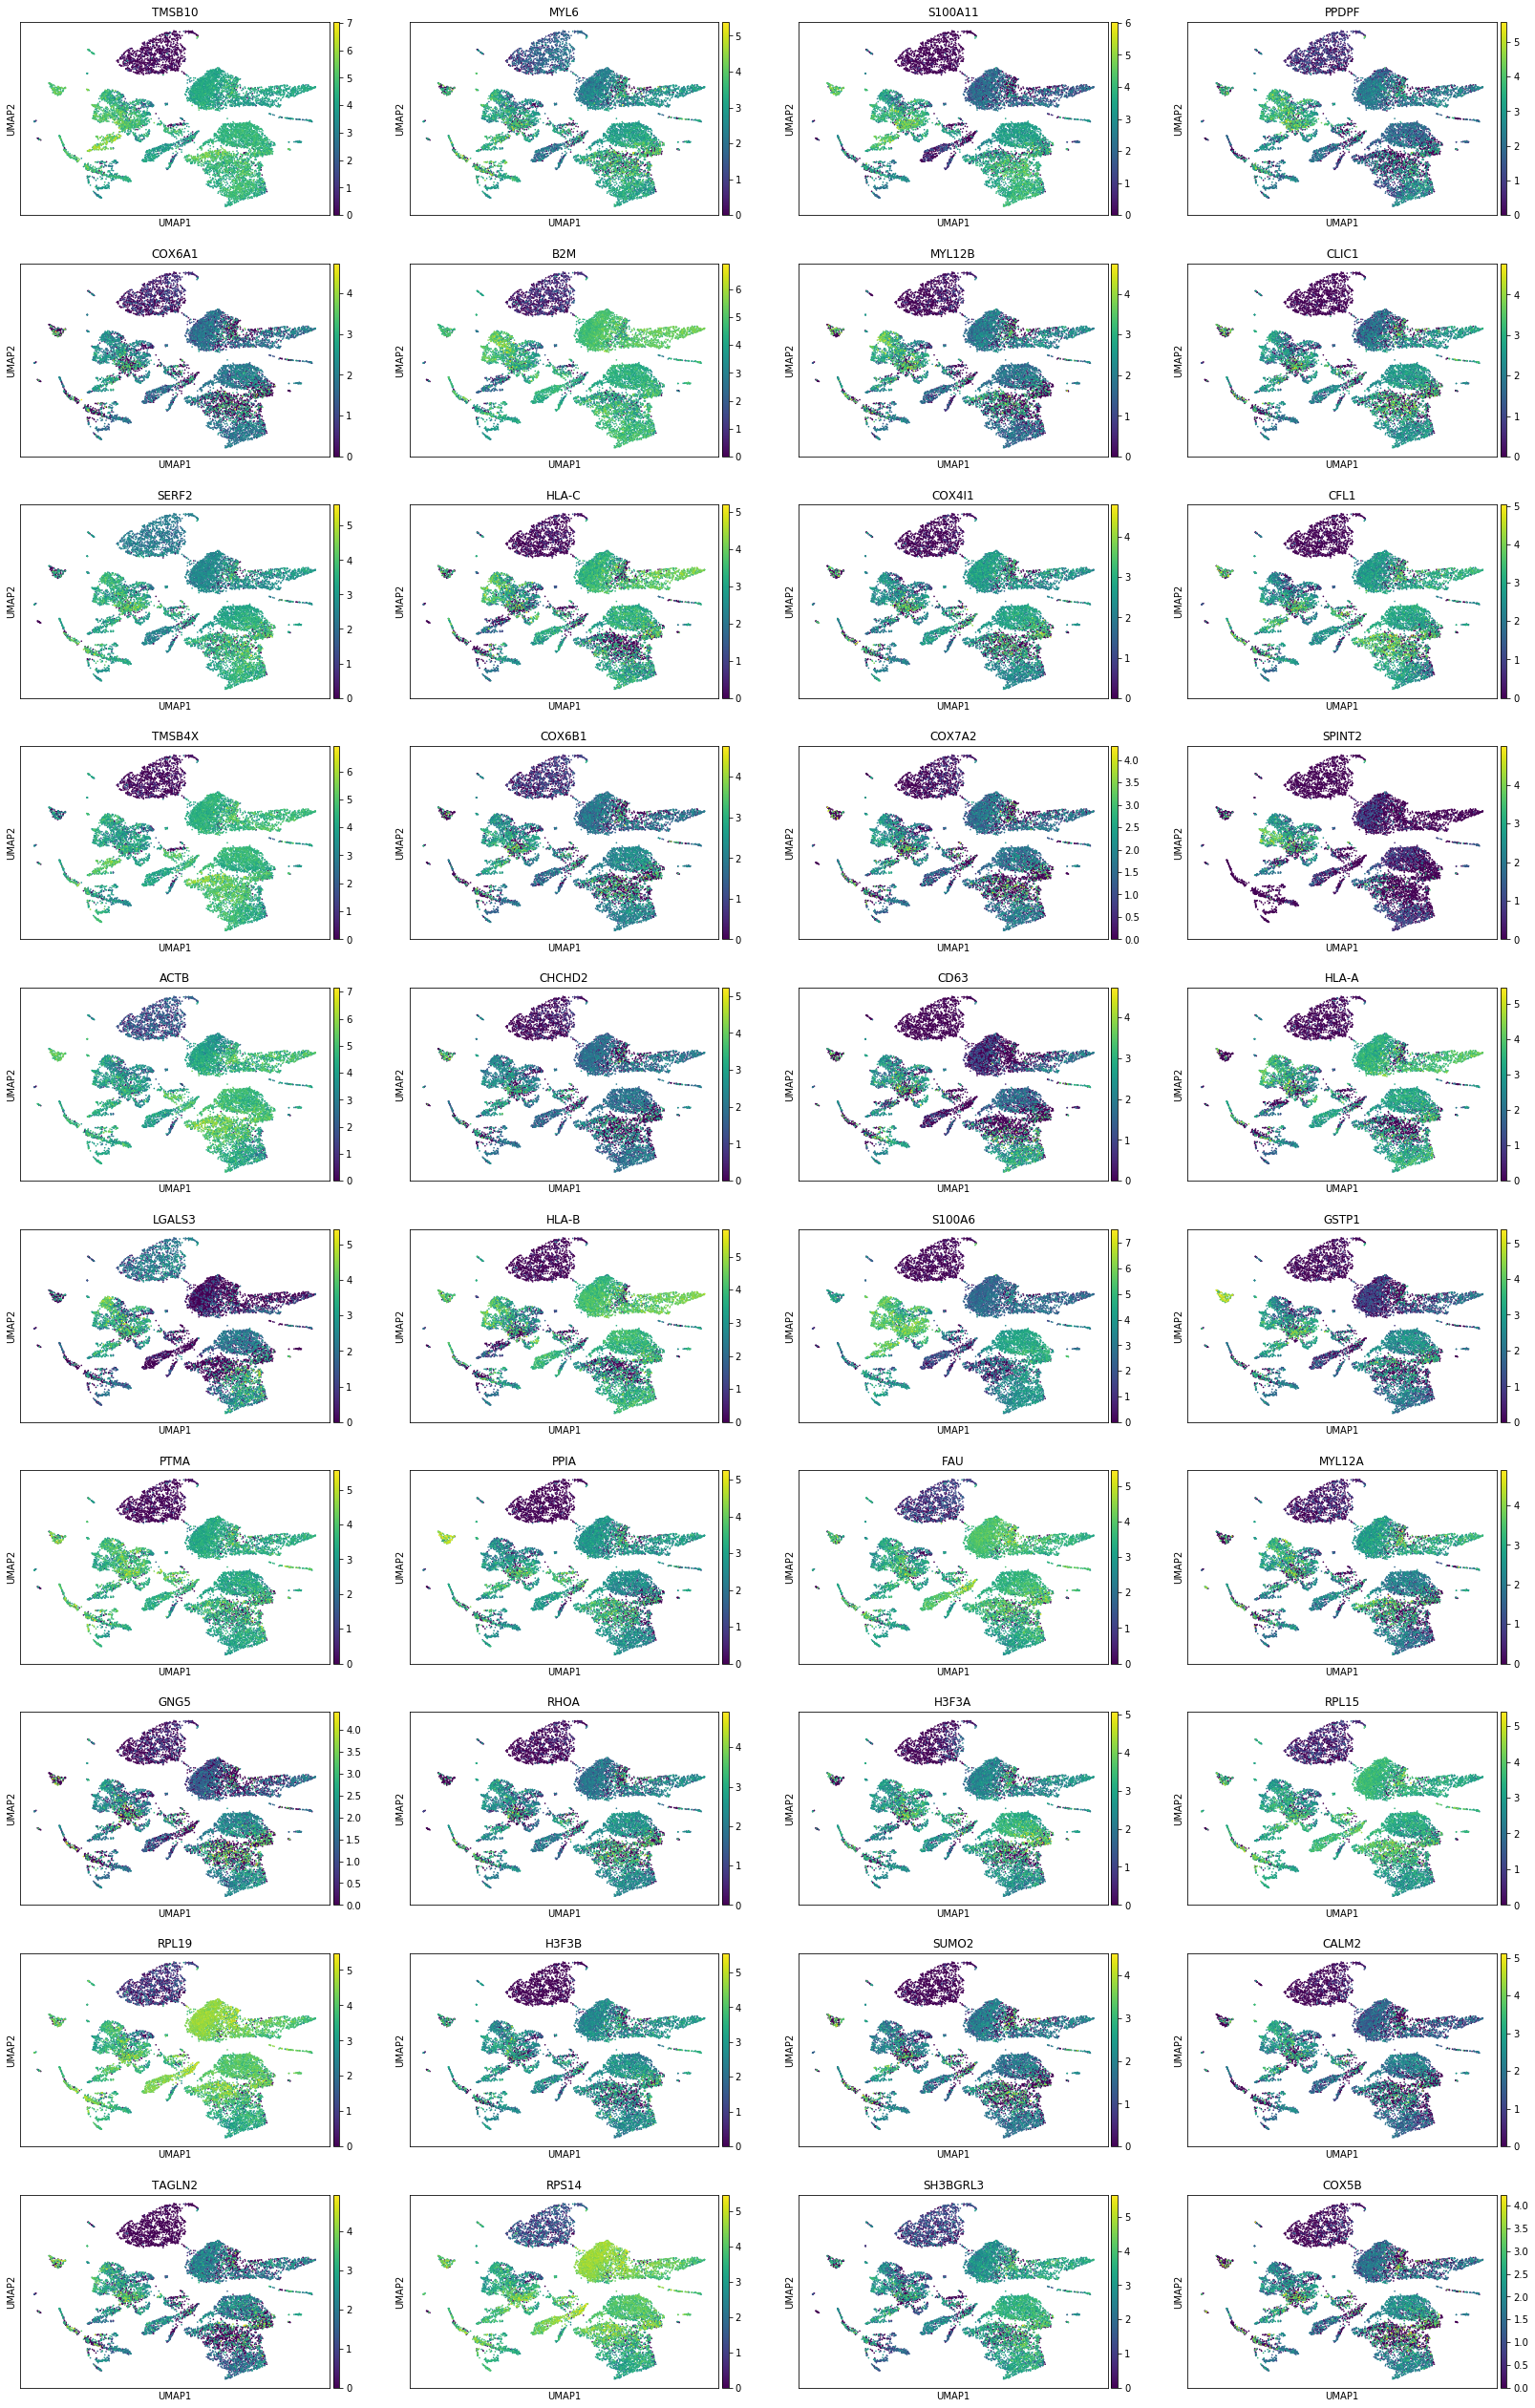

In [38]:
sc.pl.umap(adata, color=df['gene'][:40])

In [37]:
genes = ['B2M', 'HLA-C', 'HLA-A', 'HLA-B']

In [40]:
adata

AnnData object with n_obs × n_vars = 11030 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type', 'cytotrace'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 

In [47]:
for x in list(df['gene'][:100]): print(x)

TMSB10
MYL6
S100A11
PPDPF
COX6A1
B2M
MYL12B
CLIC1
SERF2
HLA-C
COX4I1
CFL1
TMSB4X
COX6B1
COX7A2
SPINT2
ACTB
CHCHD2
CD63
HLA-A
LGALS3
HLA-B
S100A6
GSTP1
PTMA
PPIA
FAU
MYL12A
GNG5
RHOA
H3F3A
RPL15
RPL19
H3F3B
SUMO2
CALM2
TAGLN2
RPS14
SH3BGRL3
COX5B
ARPC3
RPL8
ANXA2
TMBIM6
FTH1
RPS26
RPS27A
PRDX5
SRP14
UBL5
TPT1
ROMO1
EEF1A1
TMEM258
TXN
KRT18
RPL11
RAC1
RPL29
RPS15A
EPCAM
DSTN
EDF1
ACTG1
RPS25
OST4
RPL37
RPL41
RPL39
RPL13
COX6C
HSP90AA1
RPS27
YWHAZ
NDUFB4
RPL24
HSBP1
TSPO
RPLP2
RPS12
RHOC
RPS28
RPL10
RPS13
RPS3
KRT8
RPL7A
IFI27
OAZ1
RPL35A
KRT19
RPS15
COX7C
RPL28
GPX4
COX8A
TMEM59
RPL14
UBA52
TSPAN3


In [48]:
list(df['gene'][:100])

['TMSB10',
 'MYL6',
 'S100A11',
 'PPDPF',
 'COX6A1',
 'B2M',
 'MYL12B',
 'CLIC1',
 'SERF2',
 'HLA-C',
 'COX4I1',
 'CFL1',
 'TMSB4X',
 'COX6B1',
 'COX7A2',
 'SPINT2',
 'ACTB',
 'CHCHD2',
 'CD63',
 'HLA-A',
 'LGALS3',
 'HLA-B',
 'S100A6',
 'GSTP1',
 'PTMA',
 'PPIA',
 'FAU',
 'MYL12A',
 'GNG5',
 'RHOA',
 'H3F3A',
 'RPL15',
 'RPL19',
 'H3F3B',
 'SUMO2',
 'CALM2',
 'TAGLN2',
 'RPS14',
 'SH3BGRL3',
 'COX5B',
 'ARPC3',
 'RPL8',
 'ANXA2',
 'TMBIM6',
 'FTH1',
 'RPS26',
 'RPS27A',
 'PRDX5',
 'SRP14',
 'UBL5',
 'TPT1',
 'ROMO1',
 'EEF1A1',
 'TMEM258',
 'TXN',
 'KRT18',
 'RPL11',
 'RAC1',
 'RPL29',
 'RPS15A',
 'EPCAM',
 'DSTN',
 'EDF1',
 'ACTG1',
 'RPS25',
 'OST4',
 'RPL37',
 'RPL41',
 'RPL39',
 'RPL13',
 'COX6C',
 'HSP90AA1',
 'RPS27',
 'YWHAZ',
 'NDUFB4',
 'RPL24',
 'HSBP1',
 'TSPO',
 'RPLP2',
 'RPS12',
 'RHOC',
 'RPS28',
 'RPL10',
 'RPS13',
 'RPS3',
 'KRT8',
 'RPL7A',
 'IFI27',
 'OAZ1',
 'RPL35A',
 'KRT19',
 'RPS15',
 'COX7C',
 'RPL28',
 'GPX4',
 'COX8A',
 'TMEM59',
 'RPL14',
 'UBA52',
 'TSPAN3